<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Energy_bands_of_a_topological_semimetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

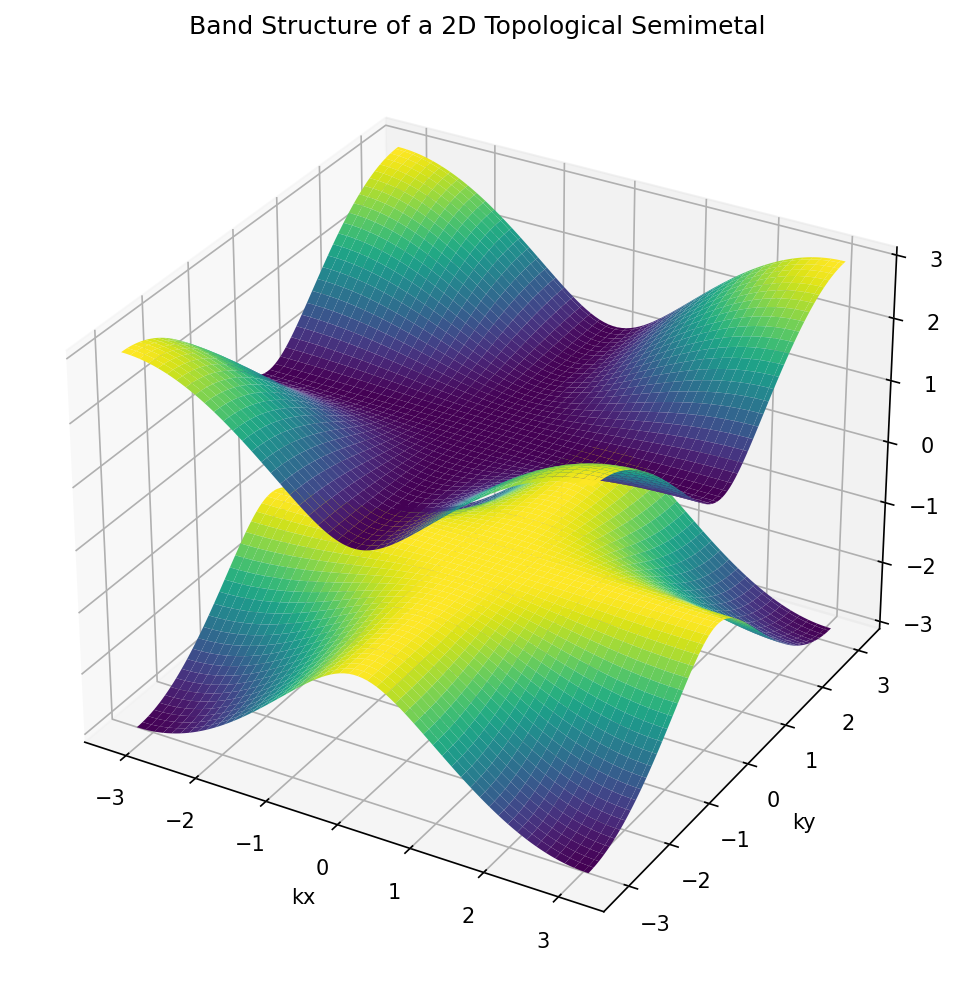

In [6]:
# Band structure of a 2D topological semimetal based on a given model Hamiltonian.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the model Hamiltonian for a 2D topological semimetal
def H(kx, ky):
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    return np.sin(kx) * sigma_x + np.sin(ky) * sigma_y + (1 - np.cos(kx) - np.cos(ky)) * sigma_z

# Calculate the eigenvalues (band structure)
kx = np.linspace(-np.pi, np.pi, 100)
ky = np.linspace(-np.pi, np.pi, 100)
kx, ky = np.meshgrid(kx, ky)
eigenvalues = np.array([np.linalg.eigvalsh(H(kx_i, ky_i)) for kx_i, ky_i in zip(np.ravel(kx), np.ravel(ky))])

# Reshape for plotting
eigenvalues = eigenvalues.reshape(kx.shape + (2,))

# Plotting
fig = plt.figure(figsize=(10, 8), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx, ky, eigenvalues[:,:,0], cmap='viridis')
ax.plot_surface(kx, ky, eigenvalues[:,:,1], cmap='viridis')
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
ax.set_title('Band Structure of a 2D Topological Semimetal')
plt.show()


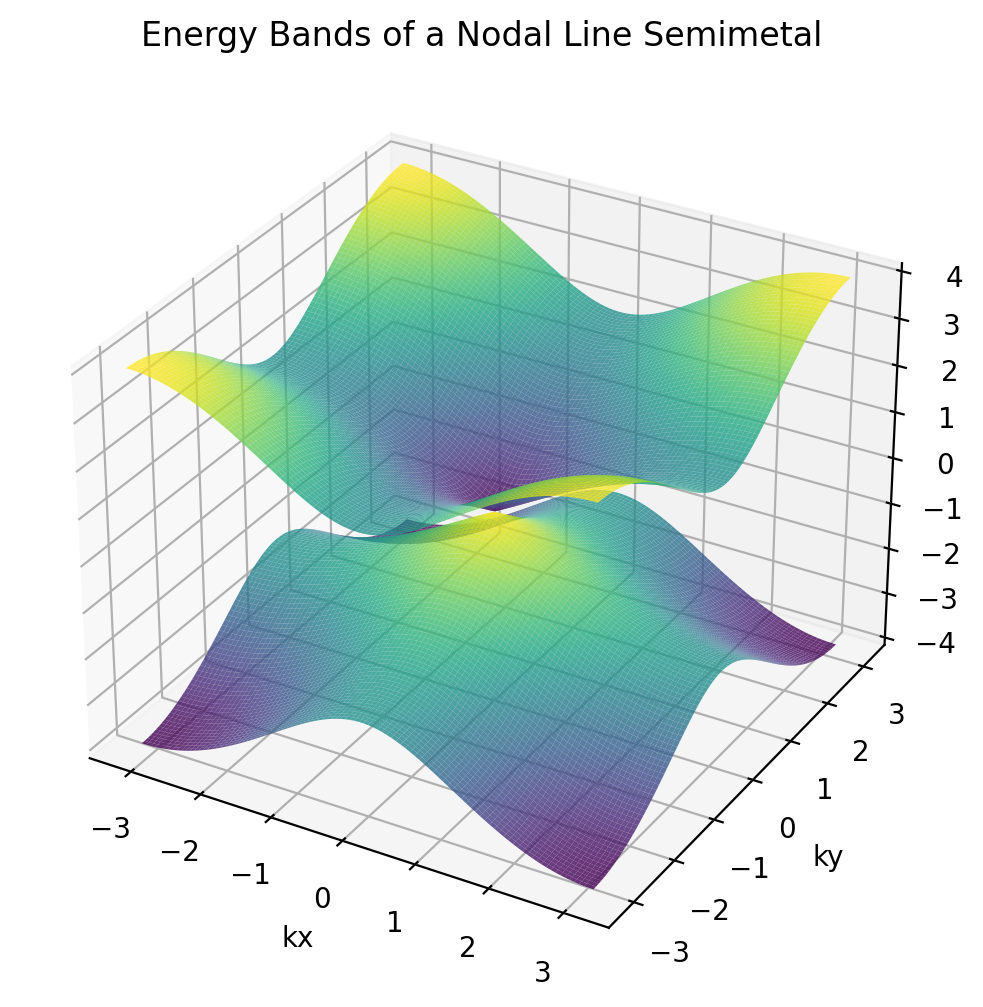

In [9]:
# Energy bands of a nodal line semimetal, based on the simple two-band model Hamiltonian.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Hamiltonian for a simple nodal line semimetal
def hamiltonian(kx, ky, M):
    dx = np.sin(kx)
    dy = np.sin(ky)
    dz = M - np.cos(kx) - np.cos(ky)

    H = np.array([[dz, dx - 1j*dy],
                  [dx + 1j*dy, -dz]])
    return H

# Calculate the eigenvalues (energy bands) for the Hamiltonian
def energy_bands(kx, ky, M):
    H = hamiltonian(kx, ky, M)
    eigenvalues, _ = np.linalg.eigh(H)
    return eigenvalues

# Define a grid in k-space
kx = np.linspace(-np.pi, np.pi, 100)
ky = np.linspace(-np.pi, np.pi, 100)
kx, ky = np.meshgrid(kx, ky)

# Parameter M
M = 2.0

# Compute energy bands
energies = np.array([energy_bands(kxi, kyi, M) for kxi, kyi in zip(np.ravel(kx), np.ravel(ky))])
energies = energies.reshape(kx.shape + (-1,))

# Plotting the energy bands
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(kx, ky, energies[:,:,0], rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.8)
ax.plot_surface(kx, ky, energies[:,:,1], rstride=1, cstride=1, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
ax.set_title('Energy Bands of a Nodal Line Semimetal')
plt.show()
